# K-Means

K-means clustering is an unsupervised machine learning algorithm that groups unlabeled data into a predefined number of clusters. It is one of the most popular clustering algorithms due to its simplicity and effectiveness.


![K-means](https://static.javatpoint.com/tutorial/machine-learning/images/k-means-clustering-algorithm-in-machine-learning.png)

## How does k-means clustering work?
K-means clustering is an iterative algorithm that tries to partition a dataset into K pre-defined distinct non-overlapping subgroups (clusters) where each data point belongs to only one group. The algorithm minimises the distance between data points within a cluster and maximises the distance between data points in different clusters.

Steps:

1. Specify the number of clusters, K.
2. Select K points at random to act as the centroids of the clusters.
3. Assign each data point to the closest centroid.
4. Compute new centroids for each cluster by moving the centroid to the center of the data points assigned to that cluster.
5. Repeat steps 3 and 4 until the centroids no longer change.

[This website](https://www.naftaliharris.com/blog/visualizing-k-means-clustering/) is great for showing how k-means clusters and re-clusters. Please take a look and play around.

## 1. Import libraries and files 💾

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances
import plotly.graph_objects as go

## Ds_26

In [2]:
# ID of the Google Sheet for student food preferences
sheet_id = "1cQvzlF8bXEx7tpBlInpYmVaUtCvZuDnBTjhlejtUT_0"

# Title of the Google Sheet
sheet_name = "0"

# URL to download the Google Sheet as a CSV
url = f"https://docs.google.com/spreadsheets/d/{sheet_id}/export?format=csv&gid={sheet_name}"


# Create a Pandas DataFrame from the CSV data
foods_df = pd.read_csv(url,
                       index_col="student")

# Drop the `favorite_color` column
foods_df = foods_df.drop(columns="favorite_color")


## 2 Scale the data 📐
In this notebook, we are only using the MinMaxScaler to keep the code simple and focus on clustering with KMeans. However, we encourage you to experiment with other scalers, as they can have a impact on the clusters produced by KMeans.

In [3]:
# Initialise the transformer (optionally, set parameters)
my_min_max = MinMaxScaler().set_output(transform="pandas")

# Use the transformer to transform the data
scaled_features_df = my_min_max.fit_transform(foods_df)

## 3 Cluster with K-means 🫧
When we cluster with K-means, there is no visible change to the DataFrame. However, when we call the `.fit()` method, Scikit-learn performs all the necessary calculations for the clusters and stores them in the `my_kmeans` variable. We can extract the cluster assignment for each student using the `.labels_` attribute. Below, we add a new column to the DataFrame containing the cluster assignment for each student, which allows us to better understand the results.


In [5]:
# Initialise the model
my_kmeans = KMeans(n_clusters= 4, # you always choose the number of k here
                   random_state = 42)

# Fit the model to the data
my_kmeans.fit(scaled_features_df)

# Obtain the cluster output
clusters = my_kmeans.labels_
clusters


/Users/sadiakhanrupa/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([3, 0, 2, 2, 2, 2, 3, 3, 1, 3, 0, 2, 2, 1, 1, 1, 0], dtype=int32)

In [6]:
# Attach the cluster output to our original DataFrame
scaled_features_df["cluster"] = clusters

scaled_features_df

,broccoli,brussels_sprouts,hamburger (meat),oysters (raw),onion (raw),peas,olives,blue_cheese,whisky,age,cluster
student,,,,,,,,,,,
Christian,1.000,0.5,0.5,0.0,1.000,1.000000,0.7,0.5,0.9,0.074074,3
Florian,0.875,0.7,0.2,0.0,0.375,0.166667,0.0,0.0,0.5,0.135802,0
Hajer,0.000,0.4,0.1,0.6,0.625,0.166667,1.0,0.0,0.0,0.086420,2
Hans,0.375,0.0,0.0,0.0,0.000,0.500000,0.8,0.7,0.0,0.148148,2
Ikbel,0.875,0.5,0.4,0.0,0.500,0.500000,1.0,0.5,0.0,0.086420,2
Imen,0.375,0.3,0.5,0.0,0.000,0.666667,1.0,0.0,0.0,0.148148,2
Jan,1.000,1.0,0.1,0.1,0.125,0.500000,1.0,1.0,1.0,0.222222,3
Lawrence,0.750,0.8,0.8,0.7,1.000,0.500000,1.0,1.0,1.0,0.148148,3
Marina,0.750,0.0,0.9,0.6,0.000,1.000000,1.0,1.0,0.3,0.135802,1


### 3.1 Who's sitting with who for dinner?
Who's in each cluster?

In [7]:
scaled_features_df[["cluster"]].sort_values(by='cluster')

,cluster
student,
Lisardo,0
Florian,0
Marvin,0
Veronika,1
Sonia,1
Yanish,1
Marina,1
Imen,2
Ikbel,2


Are these clusters consistent with the original food preferences? Check the original DataFrame to see what you think.

#### 3.1.1. Cluster analysis - centroids
By looking at the distances between the centroids, we can tell a lot about the clusters that k-means has found.
- If the distances between the centroids are all very small, then the clusters are likely to be very similar and may not be very meaningful.
- If the distances between the centroids are all very large, then the clusters are likely to be very different, but they may also be very spread out and noisy.
- If the distances between the centroids are all roughly the same, then the clusters are likely to be well-separated and meaningful.
- If the distances between the centroids vary widely, then the clusters may overlap or be otherwise intertwined, and they may not be very meaningful.

Let's examine the cluster centroid distances for our food preference data.

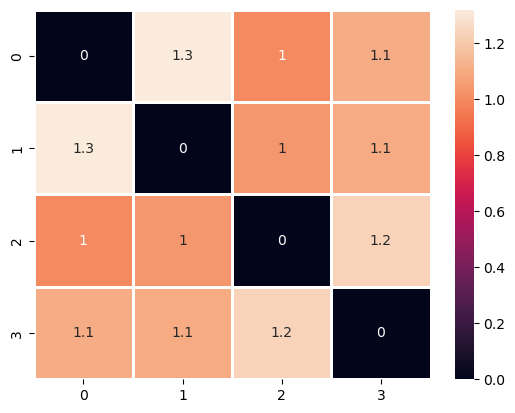

In [8]:
# Find the coordinates of each centroid using the cluster_centers_ attribute
centroids = my_kmeans.cluster_centers_

# Calculate the euclidean distance between the centroids
centroid_distances = pairwise_distances(centroids)

# Plot distances on heatmap
sns.heatmap(centroid_distances,
            annot=True,
            linewidths=1);

#### 3.1.2 Cluster analysis - column averages
By grouping the clusters and looking at the average score for each column, you can learn more about the different groups of students and their food preferences. For example, you might find that one group of students prefers healthy foods like broccoli and peas, while another group prefers more processed foods like hamburgers. You might also find that some groups of students have a more diverse range of food preferences than others.

In [9]:
scaled_features_df.groupby(by="cluster").mean()

,broccoli,brussels_sprouts,hamburger (meat),oysters (raw),onion (raw),peas,olives,blue_cheese,whisky,age
cluster,,,,,,,,,,
0,0.916667,0.733333,0.533333,0.066667,0.500000,0.277778,0.666667,0.066667,0.533333,0.427984
1,0.812500,0.325000,0.850000,0.575000,0.218750,0.916667,0.950000,0.775000,0.400000,0.080247
2,0.479167,0.383333,0.350000,0.116667,0.416667,0.472222,0.916667,0.450000,0.000000,0.102881
3,0.937500,0.575000,0.350000,0.200000,0.781250,0.625000,0.925000,0.850000,0.975000,0.163580


#### 3.1.3 Cluster analysis - radar chart

Having calculated the average score for each food by cluster, we now have a matrix that we can analyse. However, as data scientists with coding skills, we can visualise this information to gain a clearer understanding of why certain people are clustered together and why others aren't.

Visualising the data can help us to identify patterns and trends that would be difficult to see in a matrix. For example, we might be able to see that certain foods are consistently grouped together, while others are more spread out. This could suggest that there are different subgroups of students with different dietary preferences.

We can also use visualisation to identify outliers. For example, we might find a few students who have very different food preferences than the rest of the group. This could be due to a variety of factors, such as cultural background, medical conditions, or personal preferences.

In [10]:
# State the label for each arm of the chart
categories = ['broccoli', 'brussels_sprouts', 'hamburger (meat)', 'oysters (raw)',
       ' onion (raw)', 'peas', 'olives', 'blue_cheese', 'whisky', 'age']

# Create an empty list to store the objects
trace_objects = []

# Iterate over the unique cluster numbers and add an object for each cluster to the list
for cluster in sorted(scaled_features_df['cluster'].unique()):
  cluster_food_means = go.Scatterpolar(
    r=[scaled_features_df.loc[scaled_features_df["cluster"] == cluster, 'broccoli'].mean(),
      scaled_features_df.loc[scaled_features_df["cluster"] == cluster, 'brussels_sprouts'].mean(),
      scaled_features_df.loc[scaled_features_df["cluster"] == cluster, 'hamburger (meat)'].mean(),
      scaled_features_df.loc[scaled_features_df["cluster"] == cluster, 'oysters (raw)'].mean(),
      scaled_features_df.loc[scaled_features_df["cluster"] == cluster, 'onion (raw)'].mean(),
      scaled_features_df.loc[scaled_features_df["cluster"] == cluster, 'peas'].mean(),
      scaled_features_df.loc[scaled_features_df["cluster"] == cluster, 'olives'].mean(),
      scaled_features_df.loc[scaled_features_df["cluster"] == cluster, 'blue_cheese'].mean(),
      scaled_features_df.loc[scaled_features_df["cluster"] == cluster, 'whisky'].mean(),
      scaled_features_df.loc[scaled_features_df["cluster"] == cluster, 'age'].mean()],
    theta=categories,
    fill='toself',
    name=f'Cluster {cluster}'
  )
  trace_objects.append(cluster_food_means)

# Add the objects to the figure
fig = go.Figure()
fig.add_traces(trace_objects)

# Add extras to the plot such as title
# You'll always need `polar=dict(radialaxis=dict(visible=True,range=[0, 1]))` when creating a radar plot
fig.update_layout(
  title_text = 'Radar chart of mean food preferences by cluster',
  height = 600,
  width = 800,
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 1]
    )),
  showlegend=True
)

# Show the initialised plot and the layers
fig.show()

In [11]:
# Plot only students who cluster equal to i number
scaled_features_df[scaled_features_df['cluster'] == 0]


,broccoli,brussels_sprouts,hamburger (meat),oysters (raw),onion (raw),peas,olives,blue_cheese,whisky,age,cluster
student,,,,,,,,,,,
Florian,0.875,0.7,0.2,0.0,0.375,0.166667,0.0,0.0,0.5,0.135802,0
Marvin,0.875,0.7,0.9,0.1,0.625,0.000000,1.0,0.1,0.4,0.148148,0
Lisardo,1.000,0.8,0.5,0.1,0.500,0.666667,1.0,0.1,0.7,1.000000,0


#### 3.1.4. Cluster similarities - going deeper
In this section, we have provided an introductory overview of cluster analysis. When analysing clusters further, it is important to consider other factors, such as inertia or the silhouette score. We will explore inertia and the silhouette score in our next code-along, when we discuss how to determine the ideal number of clusters.



## 4. Challenge: apply this to the spotify dataset 😃
Now that you've learned how to use KMeans to create clusters, it's your turn to try it out. Use what you've learned here to cluster the Spotify data. Create some clusters and see what happens. Do you agree with the clusters KMeans has made? Why or why not?

Don't worry about the number of clusters (k) for now. We'll show you how to best estimate the number of clusters in the next code-along.